In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import re 
import nltk
from nltk.tokenize import RegexpTokenizer
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
import tensorflow as tf
from tensorflow  import keras
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from ipywidgets import widgets as w 
from ipywidgets import interact
from sklearn.datasets import make_moons, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from math import exp
from numpy.linalg import norm, pinv

In [4]:
date_1=np.load("olivetti_faces.npy")
target_1 =np.load("olivetti_faces_target.npy")

In [5]:
def show_a_random_face_per_class(images, unique_ids):
    #Creating 4X10 subplots in 18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    #iterating over user ids
    rand=np.random.randint(10)
    for unique_id in unique_ids:
        image_index=unique_id*10+rand
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("class id:{}".format(unique_id))
    plt.suptitle("40 distinct people/classes in the dataset")

In [6]:
print(date_1.shape)
print(target_1.shape)

(400, 64, 64)
(400,)


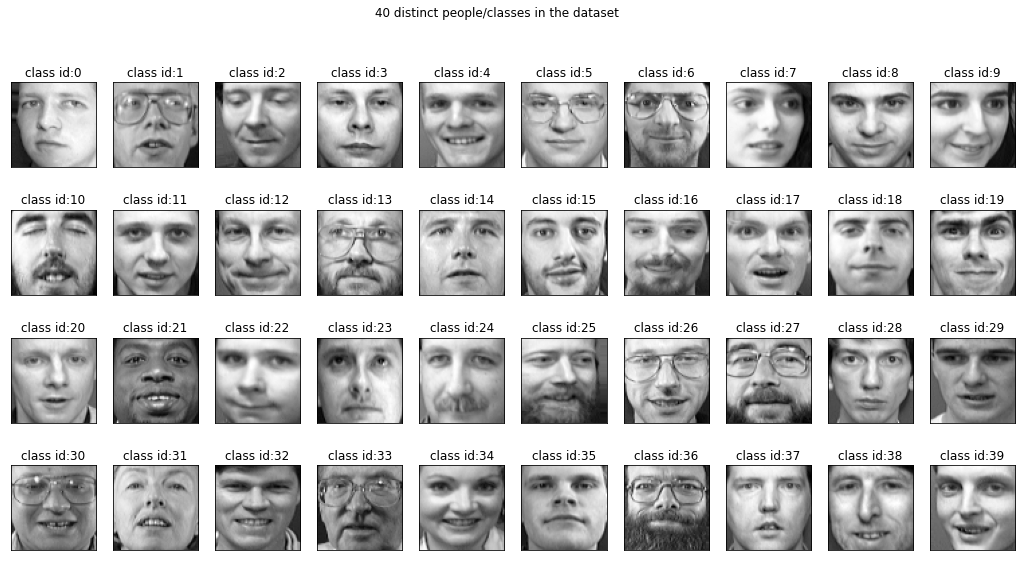

In [7]:
show_a_random_face_per_class(date_1, np.unique(target_1))


In [8]:
# show all images of selected class
def show_all_faces_of_selected_subjects(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("class id:{}".format(subject_id))

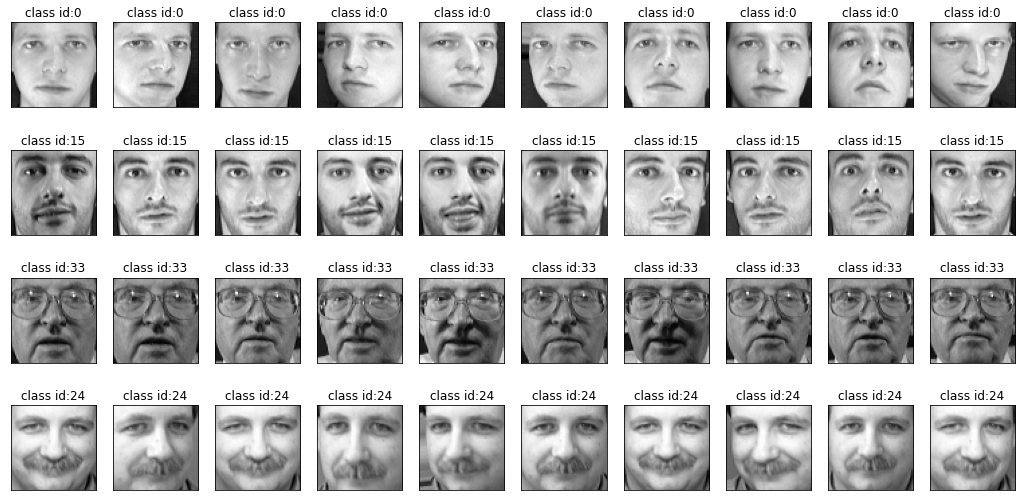

In [9]:
show_all_faces_of_selected_subjects(images=date_1, subject_ids=[0,15, 33, 24])


In [10]:
X=date_1.reshape((date_1.shape[0],date_1.shape[1]*date_1.shape[2]))
X.shape

(400, 4096)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, target_1, test_size=0.4,stratify=target_1, random_state=1)
print(X_train.shape)
print(X_test.shape)

(240, 4096)
(160, 4096)


In [12]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=10, random_state=42,activation='logistic',max_iter=1000)
clf.fit(X_train, y_train)

c:\users\a_mah\pycharmprojects\amahmoo6_assignment_1_cap5615\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=1000,
              random_state=42, solver='lbfgs')

In [13]:
from sklearn.neural_network import MLPClassifier

print(accuracy_score(y_test, clf.predict(X_test)))


0.0875


In [14]:
clf1 = make_pipeline(StandardScaler(), 
                        MLPClassifier(solver='lbfgs', hidden_layer_sizes=10, random_state=42,activation='logistic',max_iter=1000))

clf1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='logistic', hidden_layer_sizes=10,
                               max_iter=1000, random_state=42,
                               solver='lbfgs'))])

In [15]:
print(accuracy_score(y_test, clf1.predict(X_test)))


0.63125


In [16]:
dict_score = {}

for h in [10, 50, 500, (50, 10)]:
    pipe_clf = make_pipeline(MLPClassifier(solver='lbfgs', hidden_layer_sizes=h, random_state=42,activation='logistic',max_iter=1000))
    scores = cross_val_score(estimator=clf1, 
                            X = X, 
                            y = target_1,
                            cv = 10, 
                            n_jobs=1)
    dict_score[str(h)] = scores  
    

c:\users\a_mah\pycharmprojects\amahmoo6_assignment_1_cap5615\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\a_mah\pycharmprojects\amahmoo6_assignment_1_cap5615\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\a_mah\pycharmprojects\amahmoo6_assignment_1_cap5615\venv\lib\site-packages\sklearn\ne

In [17]:
scr = pd.DataFrame(dict_score)
scr["Type"] = "No Standardized"
scr

,10,50,500,"(50, 10)",Type
0,0.775,0.775,0.775,0.775,No Standardized
1,0.700,0.700,0.700,0.700,No Standardized
2,0.750,0.750,0.750,0.750,No Standardized
3,0.750,0.750,0.750,0.750,No Standardized
4,0.675,0.675,0.675,0.675,No Standardized
5,0.825,0.825,0.825,0.825,No Standardized
6,0.675,0.675,0.675,0.675,No Standardized
7,0.700,0.700,0.700,0.700,No Standardized
8,0.650,0.650,0.650,0.650,No Standardized
9,0.775,0.775,0.775,0.775,No Standardized


In [18]:
pd.DataFrame(scr.mean(), columns = ["Score"])

,Score
10,0.7275
50,0.7275
500,0.7275
"(50, 10)",0.7275


In [19]:
dict_score= {}
for h in [10, 50, 500, (50, 10)]:
    clf2 = make_pipeline(StandardScaler(),MLPClassifier(solver='lbfgs', hidden_layer_sizes=h, random_state=42,activation='logistic',max_iter=1000))
    scores = cross_val_score(estimator=clf2, 
                            X = X, 
                            y = target_1,
                            cv = 10, 
                            n_jobs=1)    
    dict_score[str(h)] = scores 

c:\users\a_mah\pycharmprojects\amahmoo6_assignment_1_cap5615\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\a_mah\pycharmprojects\amahmoo6_assignment_1_cap5615\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\users\a_mah\pycharmprojects\amahmoo6_assignment_1_cap5615\venv\lib\site-packages\sklearn\ne

In [20]:
scr_std = pd.DataFrame(dict_score)
scr_std["Type"] = "Standardized"
scr_std

,10,50,500,"(50, 10)",Type
0,0.775,1.000,1.000,0.525,Standardized
1,0.700,0.950,1.000,0.700,Standardized
2,0.750,0.950,0.950,0.650,Standardized
3,0.750,0.875,1.000,0.700,Standardized
4,0.675,0.925,1.000,0.650,Standardized
5,0.825,0.925,0.975,0.625,Standardized
6,0.675,0.900,0.975,0.600,Standardized
7,0.700,1.000,0.950,0.675,Standardized
8,0.650,0.950,0.950,0.525,Standardized
9,0.775,0.900,0.950,0.525,Standardized


In [21]:
pd.DataFrame(scr_std.mean(), columns=['Score' ])


,Score
10,0.7275
50,0.9375
500,0.9750
"(50, 10)",0.6175
